In [1]:
# import necessary modules
import numpy as np
from matplotlib import pyplot as plt
from utilities import *

In [2]:
# choose AD2 file (input signal) and bluetooth (BT) file (output signal)
# make sure to COMMENT OUT THE HEADER in the AD2 file (The line that starts w "Time (s)...")
file_path_AD2 = r"sample_5_AD2_may2022/test_acq0163.csv"
file_path_BT = r"sample_5_AD2_may2022/20220429_1741_163000_ms.txt" 

# these are constants, do NOT change them
SR_AD2 = 10000 #Hz
SR_BT = 1000 #Hz
NUM_CHANNELS_BT = 8

# this is not a constant, please change this:
num_chnnels_AD2 = 1

In [3]:
# Load data from files - formats raw bluetooth data files if needed
unformatted = True

data_AD2 = np.loadtxt(file_path_AD2, comments="#", delimiter=",")

if (unformatted):
    data = raw_file_to_array(file_path_BT)
    data_BT = int_to_millivolts(split_data_into_channels(data, NUM_CHANNELS_BT))  
else:
    data_BT = np.loadtxt(file_path_BT, comments="#", delimiter=",")

num_cols: 27735


In [4]:
# print shapes of data
print("shape of AD2 data: " + str(np.shape(data_AD2)))
print("shape of BT data: " + str(np.shape(data_BT)))


shape of AD2 data: (262144, 2)
shape of BT data: (8, 27735)


In [5]:
# convenient variables to reference data
times_AD2 = data_AD2[:, 0]
signal_AD2 = data_AD2[:, 1:]

times_BT = np.arange(0, np.size(data_BT[0])) * 1/SR_BT


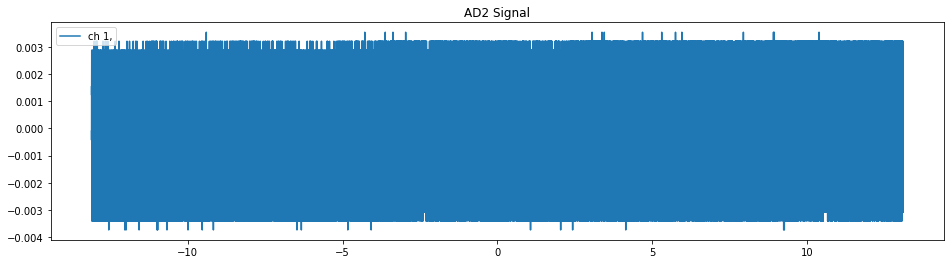

In [6]:
# Plot AD2
plt.figure(figsize=(16,4))
plt.plot(times_AD2, signal_AD2)
plt.title("AD2 Signal")
plt.legend(["ch 1,", "ch 2"])

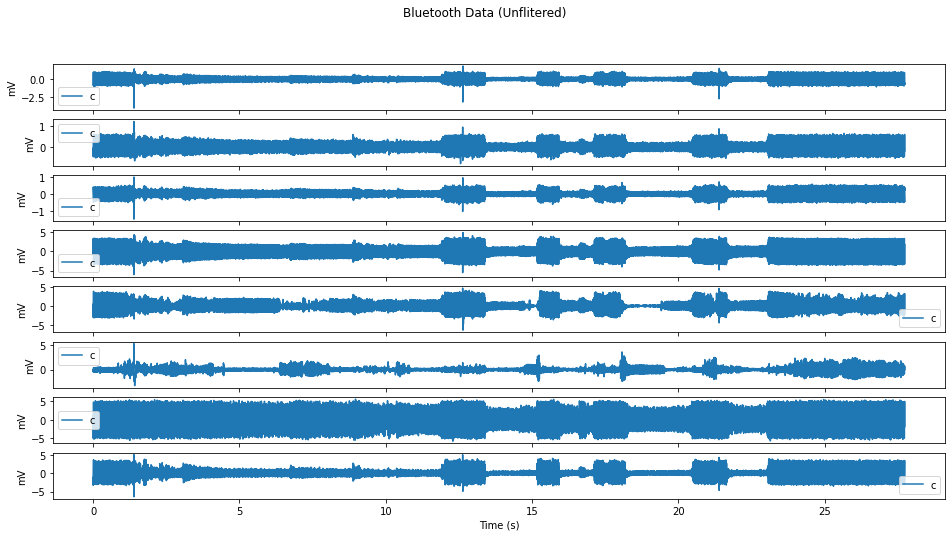

In [7]:
fig, axs = plt.subplots(NUM_CHANNELS_BT, 1)
fig.suptitle('Bluetooth Data (Unflitered)')
fig.set_figwidth(16)
fig.set_figheight(8)
for i in np.arange(NUM_CHANNELS_BT):
    axs[i].set_ylabel("mV")
    axs[i].set_xlabel("Time (s)")
    axs[i].plot(times_BT,data_BT[i])
    axs[i].legend("ch " + str(i+1))

# Hide x labels and tick labels for all but bottom plot.
for ax in axs:
    ax.label_outer()

[ 0.96353704 -1.79085528  0.96353704]
[ 1.         -1.79085528  0.92707407]


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


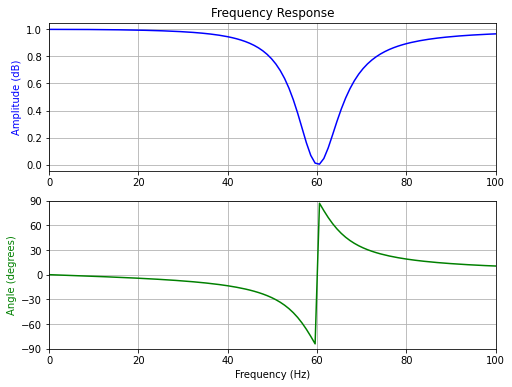

In [8]:
b, a = iir_notch(60.2, 5, SR_BT)
print(b)
print(a)
# Frequency response

freq, h = signal.freqz(b, a, fs=SR_BT)

# Plot filter
fig, ax = plt.subplots(2, 1, figsize=(8, 6))
ax[0].plot(freq, h, color='blue')
ax[0].set_title("Frequency Response")
ax[0].set_ylabel("Amplitude (dB)", color='blue')
ax[0].set_xlim([0, 100])
# ax[0].set_ylim([-25, 10])
ax[0].grid()
ax[1].plot(freq, np.unwrap(np.angle(h))*180/np.pi, color='green')
ax[1].set_ylabel("Angle (degrees)", color='green')
ax[1].set_xlabel("Frequency (Hz)")
ax[1].set_xlim([0, 100])
ax[1].set_yticks([-90, -60, -30, 0, 30, 60, 90])
ax[1].set_ylim([-90, 90])
ax[1].grid()
data_BT_filtered = apply_filter(data_BT, b, a)

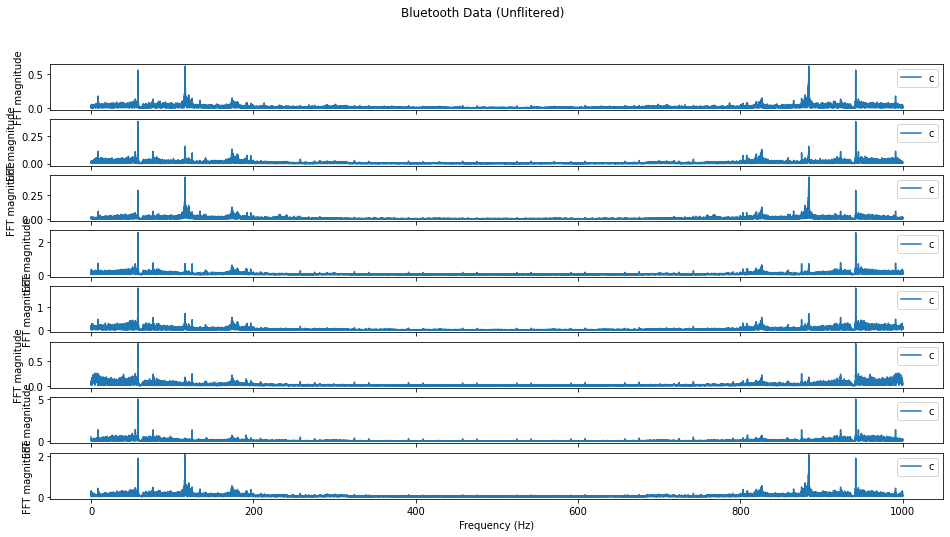

In [9]:
# Plot Unfiltered FFT

start = 0 
end = -1 

freqs_BT, fft_BT = get_fft(data_BT_filtered, SR_BT)

fig, axs = plt.subplots(NUM_CHANNELS_BT, 1)
fig.suptitle('Bluetooth Data (Unflitered)')
fig.set_figwidth(16)
fig.set_figheight(8)
for i in np.arange(NUM_CHANNELS_BT):
    axs[i].set_ylabel("FFT magnitude")
    axs[i].set_xlabel("Frequency (Hz)")
    axs[i].plot(freqs_BT,abs(fft_BT[i]))
    axs[i].legend("ch " + str(i+1))

# Hide x labels and tick labels for all but bottom plot.
for ax in axs:
    ax.label_outer()

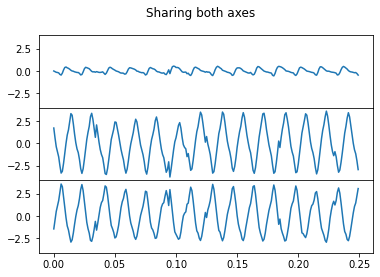

In [21]:
# Plot filtered BT data:

plot_split_data(data_BT[2:5,13000:13250], SR_BT, filtered=True)